In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

yearly_df = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

display(yearly_df)


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. 

You'll notice that giving birth was very dangerous because there are an alarming number of women died as the result of childbirth, most of them from childbed fever.

We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

In [28]:
yearly_df.groupby(['year','clinic']).apply(lambda x: x['deaths']/x['births'])


year  clinic      
1841  clinic 1  0     0.078063
      clinic 2  6     0.035217
1842  clinic 1  1     0.157591
      clinic 2  7     0.075968
1843  clinic 1  2     0.089542
      clinic 2  8     0.059876
1844  clinic 1  3     0.082357
      clinic 2  9     0.023004
1845  clinic 1  4     0.069015
      clinic 2  10    0.020364
1846  clinic 1  5     0.114464
      clinic 2  11    0.027970
dtype: float64

In [29]:
yearly_df['proportion_deaths'] = yearly_df['deaths'] / yearly_df['births']

clinic_1 = yearly_df[yearly_df['clinic']=='clinic 1']
clinic_2 = yearly_df[yearly_df['clinic']=='clinic 2']

clinic_1


,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


<Axes: xlabel='year', ylabel='Proportion of Deaths'>

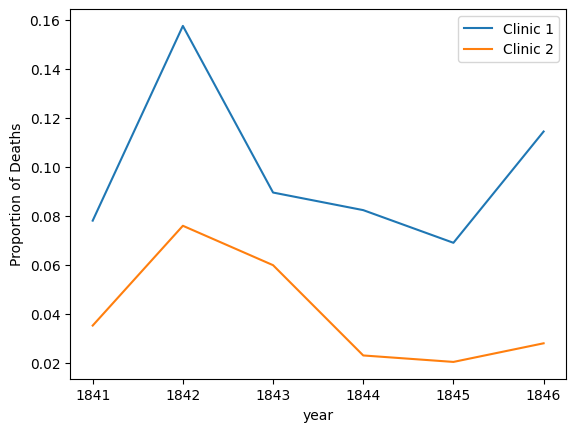

In [30]:
ax = clinic_1.plot(x="year", y="proportion_deaths", label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax, ylabel="Proportion of Deaths")


Why is the proportion of deaths consistently so much higher in Clinic 1? The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. 

Maybe something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, there was a new policy which was every health workers must wash their hands to sanitize.
 
Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

In [31]:
monthly_df = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

monthly_df['proportion_deaths'] = monthly_df['deaths']/monthly_df['births']

monthly_df


,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


Proportion of deaths per month

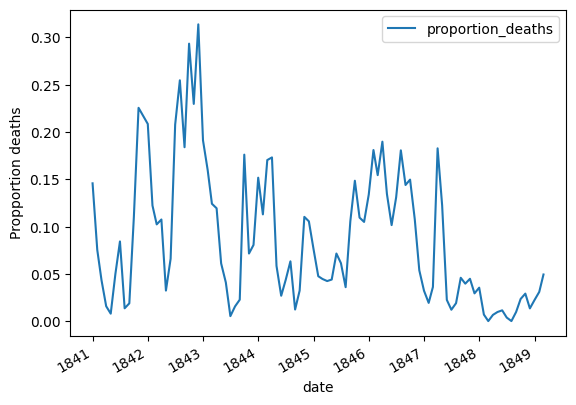

In [32]:
ax = monthly_df.plot(x='date', y='proportion_deaths', ylabel='Propportion deaths')


Starting from the summer of 1847 the proportion of deaths is drastically reduced, the effect of handwashing is made even more clear if we highlight this in the graph.

<Axes: xlabel='date', ylabel='Propportion deaths'>

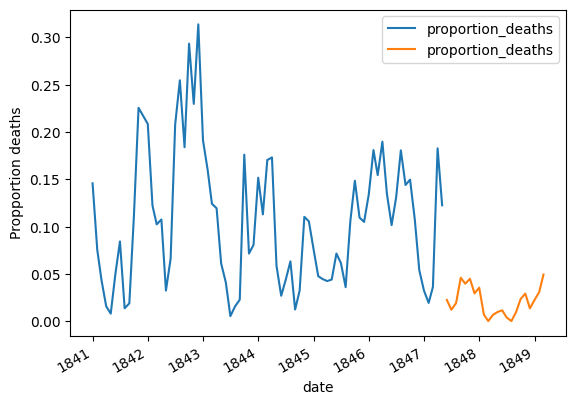

In [33]:
handwashing_start = pd.to_datetime('1847-06-01')

before_washing = monthly_df[monthly_df['date']<handwashing_start]
after_washing = monthly_df[monthly_df['date']>=handwashing_start]

ax = before_washing.plot(x='date', y='proportion_deaths')
after_washing.plot(ax=ax, x='date', y='proportion_deaths', ylabel='Propportion deaths')


In [34]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

mean_diff = after_proportion.mean()-before_proportion.mean()
mean_diff


-0.08395660751183336

It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). 
To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).

In [35]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


0.025   -0.099873
0.975   -0.067208
dtype: float64

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence that childbed fever was caused by some bacteria, the medical community largely rejected this method.